<h1><center>K-Nearest Neighbors</center></h1>
- En este micro-proyecto se implementará el algoritmo de clasificación KNN. 

- Se cargará, ajustará y usará K-Nearest Neighbors para predecir un conjunto de puntos.

- **K-Nearest neighbors** es un algoritmo de clasificación para aprendizaje Supervisado. Este algoritmo toma un monton de puntos etiquetados y los utiliza para aprender a etiquetar otros puntos de datos. En **KNN** se dice que los puntos de datos que están cerca unos de otros son vecinos.

### Aqui esta una visualización de el algoritmo K-Nearest Neighbord

<img src="https://ibm.box.com/shared/static/mgkn92xck0z05v7yjq8pqziukxvc2461.png">

- En la gráfica tenemos data points de Clase A y Clase B. Queremos predecir a que clase pertenece el punto central estrella. Si consideramos un valor de K = 3 (3 puntos de datos mas cercanos) ontendremos una predicción de Clase B. Sin embargo, si consideramos un valor de K de 6, obtendremos una prediccion de Clase A. 

- En este sentido, es importante considerar el valor de K. 

> - ## Vamos a importar las librerias requeridas

In [1]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

> - ### Sobre el Dataset

- Suponiendo un proveedor de Telecomunicaciones ha segmentado su base de clientes por patrones de uso de servicio, categorizando los clientes en 4 grupos. Si se pueden usar datos demograficos para predecir la pertenencia a un grupo, la empresa puede personalizar las ofertas para clientes con perspectiva individual.
- Este es un problema de clasificacion, es decir, dado un dataset con etiquetas predefinidas, necesitamos construir un modelo para predecir la clase de un nuevo o un desconocido caso.

- Este ejemplo se enfoca en usar los datos demograficos, tales como region, años, y estado civil, para predecir patrones de uso. El target u objetivo, llamado **custcat**, tiene 4 posibles valores que corresponden a los 4 grupos de clientes, y son los siguientes: 

1. Basic Service
2. E-Service
3. Plus Service
4. Total Service

- Nuestro objetivo es construir un clasificador, para predecir la clase de casos desconocidos. Usaremos un tipo especifico de clasificación llamado K-Nearest Neighbord.

> ## Cargamos los datos desde el archivo CSV

- Cargamos los datos `teleCust1000t.csv` y vemos las primeras 10 filas

In [2]:
df = pd.read_csv('teleCust1000t.csv')
df.head(10)

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3
5,2,41,39,0,17,78.0,2,16,0.0,1,1,3
6,3,45,22,1,2,19.0,2,4,0.0,1,5,2
7,2,38,35,0,5,76.0,2,10,0.0,0,3,4
8,3,45,59,1,7,166.0,4,31,0.0,0,5,3
9,1,68,41,1,21,72.0,1,22,0.0,0,3,2


> ## Visualización de los datos y Analisis

- Veamos cuantos clientes de cada clase están en nuestro dataset

In [3]:
df['custcat'].value_counts()

3    281
1    266
4    236
2    217
Name: custcat, dtype: int64

- Podemos ver lo siguiente **281 Plus Service, 266 Basic-service, 236 Total Service, and 217 E-Service customers**

- Podemos explorar los datos usando tecnicas de visualización

array([[<AxesSubplot:title={'center':'income'}>]], dtype=object)

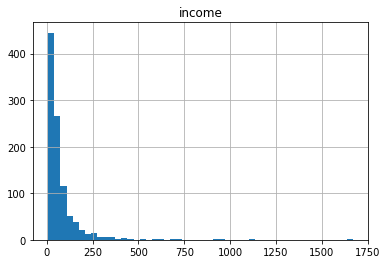

In [4]:
df.hist(column='income', bins=50)

array([[<AxesSubplot:title={'center':'region'}>]], dtype=object)

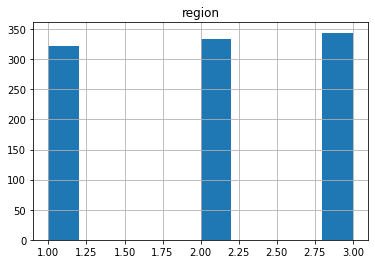

In [5]:
df.hist(column='region')

> ## Conjunto de características

- Definimos el conjunto de caracteristicas, X:

In [6]:
df.columns

Index(['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed',
       'employ', 'retire', 'gender', 'reside', 'custcat'],
      dtype='object')

- Para usar la libreria *scikit-learn*, tenemos que convertir los Pandas dataframe a una matriz Numpy:

In [7]:
X = df[['region', 'tenure','age', 'marital', 'address', 'income', 'ed', 'employ','retire', 'gender', 'reside']] .values  #.astype(float)
X[0:5]

array([[  2.,  13.,  44.,   1.,   9.,  64.,   4.,   5.,   0.,   0.,   2.],
       [  3.,  11.,  33.,   1.,   7., 136.,   5.,   5.,   0.,   0.,   6.],
       [  3.,  68.,  52.,   1.,  24., 116.,   1.,  29.,   0.,   1.,   2.],
       [  2.,  33.,  33.,   0.,  12.,  33.,   2.,   0.,   0.,   1.,   1.],
       [  2.,  23.,  30.,   1.,   9.,  30.,   1.,   2.,   0.,   0.,   4.]])

- Hacemos lo mismo para las etiquetas o labels

In [9]:
y = df['custcat'].values
y[0:10]

array([1, 4, 3, 1, 3, 3, 2, 4, 3, 2], dtype=int64)

> ## Normalizamos los datos

La estandarización de los datos dan a los datos una media zero, y una variance unitaria. Esta es una buena practica, especialmente para algoritmos tales como KNN el cual esta basado sobre la distancia de casos.

In [12]:
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:5]

array([[-0.02696767, -1.055125  ,  0.18450456,  1.0100505 , -0.25303431,
        -0.12650641,  1.0877526 , -0.5941226 , -0.22207644, -1.03459817,
        -0.23065004],
       [ 1.19883553, -1.14880563, -0.69181243,  1.0100505 , -0.4514148 ,
         0.54644972,  1.9062271 , -0.5941226 , -0.22207644, -1.03459817,
         2.55666158],
       [ 1.19883553,  1.52109247,  0.82182601,  1.0100505 ,  1.23481934,
         0.35951747, -1.36767088,  1.78752803, -0.22207644,  0.96655883,
        -0.23065004],
       [-0.02696767, -0.11831864, -0.69181243, -0.9900495 ,  0.04453642,
        -0.41625141, -0.54919639, -1.09029981, -0.22207644,  0.96655883,
        -0.92747794],
       [-0.02696767, -0.58672182, -0.93080797,  1.0100505 , -0.25303431,
        -0.44429125, -1.36767088, -0.89182893, -0.22207644, -1.03459817,
         1.16300577]])

> ## Train/Test Split
- Haciendo un *train* y *test* sobre el mismo dataset, lo mas probable es que tenga una baja presicion fuera de la muestra, debido a la probebilidad de realizar over-fit.

- Es importante que nuestro modelo tenga una alta presicion fuera de la muestra, porque el proposito de cualquier modelo, por supuesto, es hacer correctas predicciones sobre datos desconocidos. Entonces para mejorar la presicion fuera de la muestra, una de las formas es usar un enfoque de evaluacion llamado **Train/Test Split**. Train/Test Split inplica dividir el dataset en entrenamiento y prueba. Este provee al modelo mejor presicion fuera de la muestra. 

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)
print('Train set: ', X_train.shape, y_train.shape)
print('Test set: ', X_test.shape, y_test.shape)

Train set:  (800, 11) (800,)
Test set:  (200, 11) (200,)


> ## Clasificaciçon

>### K Nearest neighbor (KNN)

> #### Importando librerias requeridas

In [15]:
from sklearn.neighbors import KNeighborsClassifier

>### Entrenando

- Comenzaremos el algoritmo con k=4 por ahora:

In [18]:
k = 4
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh

KNeighborsClassifier(n_neighbors=4)

>### Prediciendo

- Podemos usar el modelo para predecir el *test set*

In [19]:
yhat = neigh.predict(X_test)
yhat[0:5]

array([1, 1, 3, 2, 4], dtype=int64)

>### Evaluacion de la presicion

- En clasificacion multiclase, **accuracy classification score** es una funcion que computa la presicion del subconjunto. Esta funcion es igual a la funcion de **jaccard_similarity_score**. Esencialmente, esto calcula cuan cercano esta la etiqueta actual y la etiqueta predecida estan emparejados en el **test set**. 

In [20]:
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.5475
Test set Accuracy:  0.32


>### Evaluacion de la presicion

Construccion del modelo, pero esta ves con k = 6

In [21]:
k = 6
neigh6 = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
yhat6 = neigh6.predict(X_test)
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh6.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat6))

Train set Accuracy:  0.51625
Test set Accuracy:  0.31


>### Como elegir el mejor valor de K para el modelo

- Para elegir el mejor valor de K para los data points, la solucion general es reservar una parte de los datos para probar la presicion del modelo. Entonces elegir k = 1, usar una parte del entrenamiento para el modelado, y calcular la presicion de las predicciones usando todas las muestras de el *test set*. Repetir este proceso, incrementando el valor de K, y ver cual K es el mejor para el modelo.

- Podemos calcular la presicion del algoritmo KNN para diferentes K's.

In [22]:
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.3  , 0.29 , 0.315, 0.32 , 0.315, 0.31 , 0.335, 0.325, 0.34 ])

> ### Grafico del modelo de Precision para diferentes numeros de Neighbors

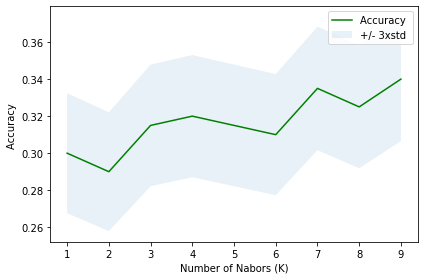

In [23]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

In [24]:
print("El mejor accuracy fue con", mean_acc.max(), "with k=", mean_acc.argmax()+1 )

El mejor accuracy fue con 0.34 with k= 9
